In [122]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [123]:
df=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [124]:
df.drop(['PassengerId','Name','Ticket'], axis=1,  inplace=True)#drop Id column as it isn't of use
test.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [125]:
for column in df:      #drop columns that have more than 30% NaN values
    if df[column].count() / len(df) <= 0.3:
        df.drop(column, axis=1, inplace=True)
        print("Dropped feature ",column)
for column in test:      #drop columns that have more than 30% NaN values
    if test[column].count() / len(test) <= 0.3:
        test.drop(column, axis=1, inplace=True)
        print("Dropped feature ",column)

Dropped feature  Cabin
Dropped feature  Cabin


In [126]:
cat_cols = df.select_dtypes(exclude=['int64', 'float64']).columns #find out quantitative columns
num_cols=df.select_dtypes(['int64','float64']).columns  #find out categorical columns
cat_cols

Index(['Sex', 'Embarked'], dtype='object')

In [127]:
num_cols

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [128]:
for i in df.columns:
    if i in cat_cols:
        df[i]=df[i].fillna(df[i].mode()[0])#fill null values in cat_cols with mode
    else:
        df[i]=df[i].fillna(df[i].median())#fill null values in num_cols with median
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [129]:
for i in test.columns:
    if i in cat_cols:
        test[i]=test[i].fillna(test[i].mode()[0])#fill null values in cat_cols with mode
    else:
        test[i]=test[i].fillna(test[i].median())#fill null values in num_cols with median
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8082d1c518>,
      dtype=object)

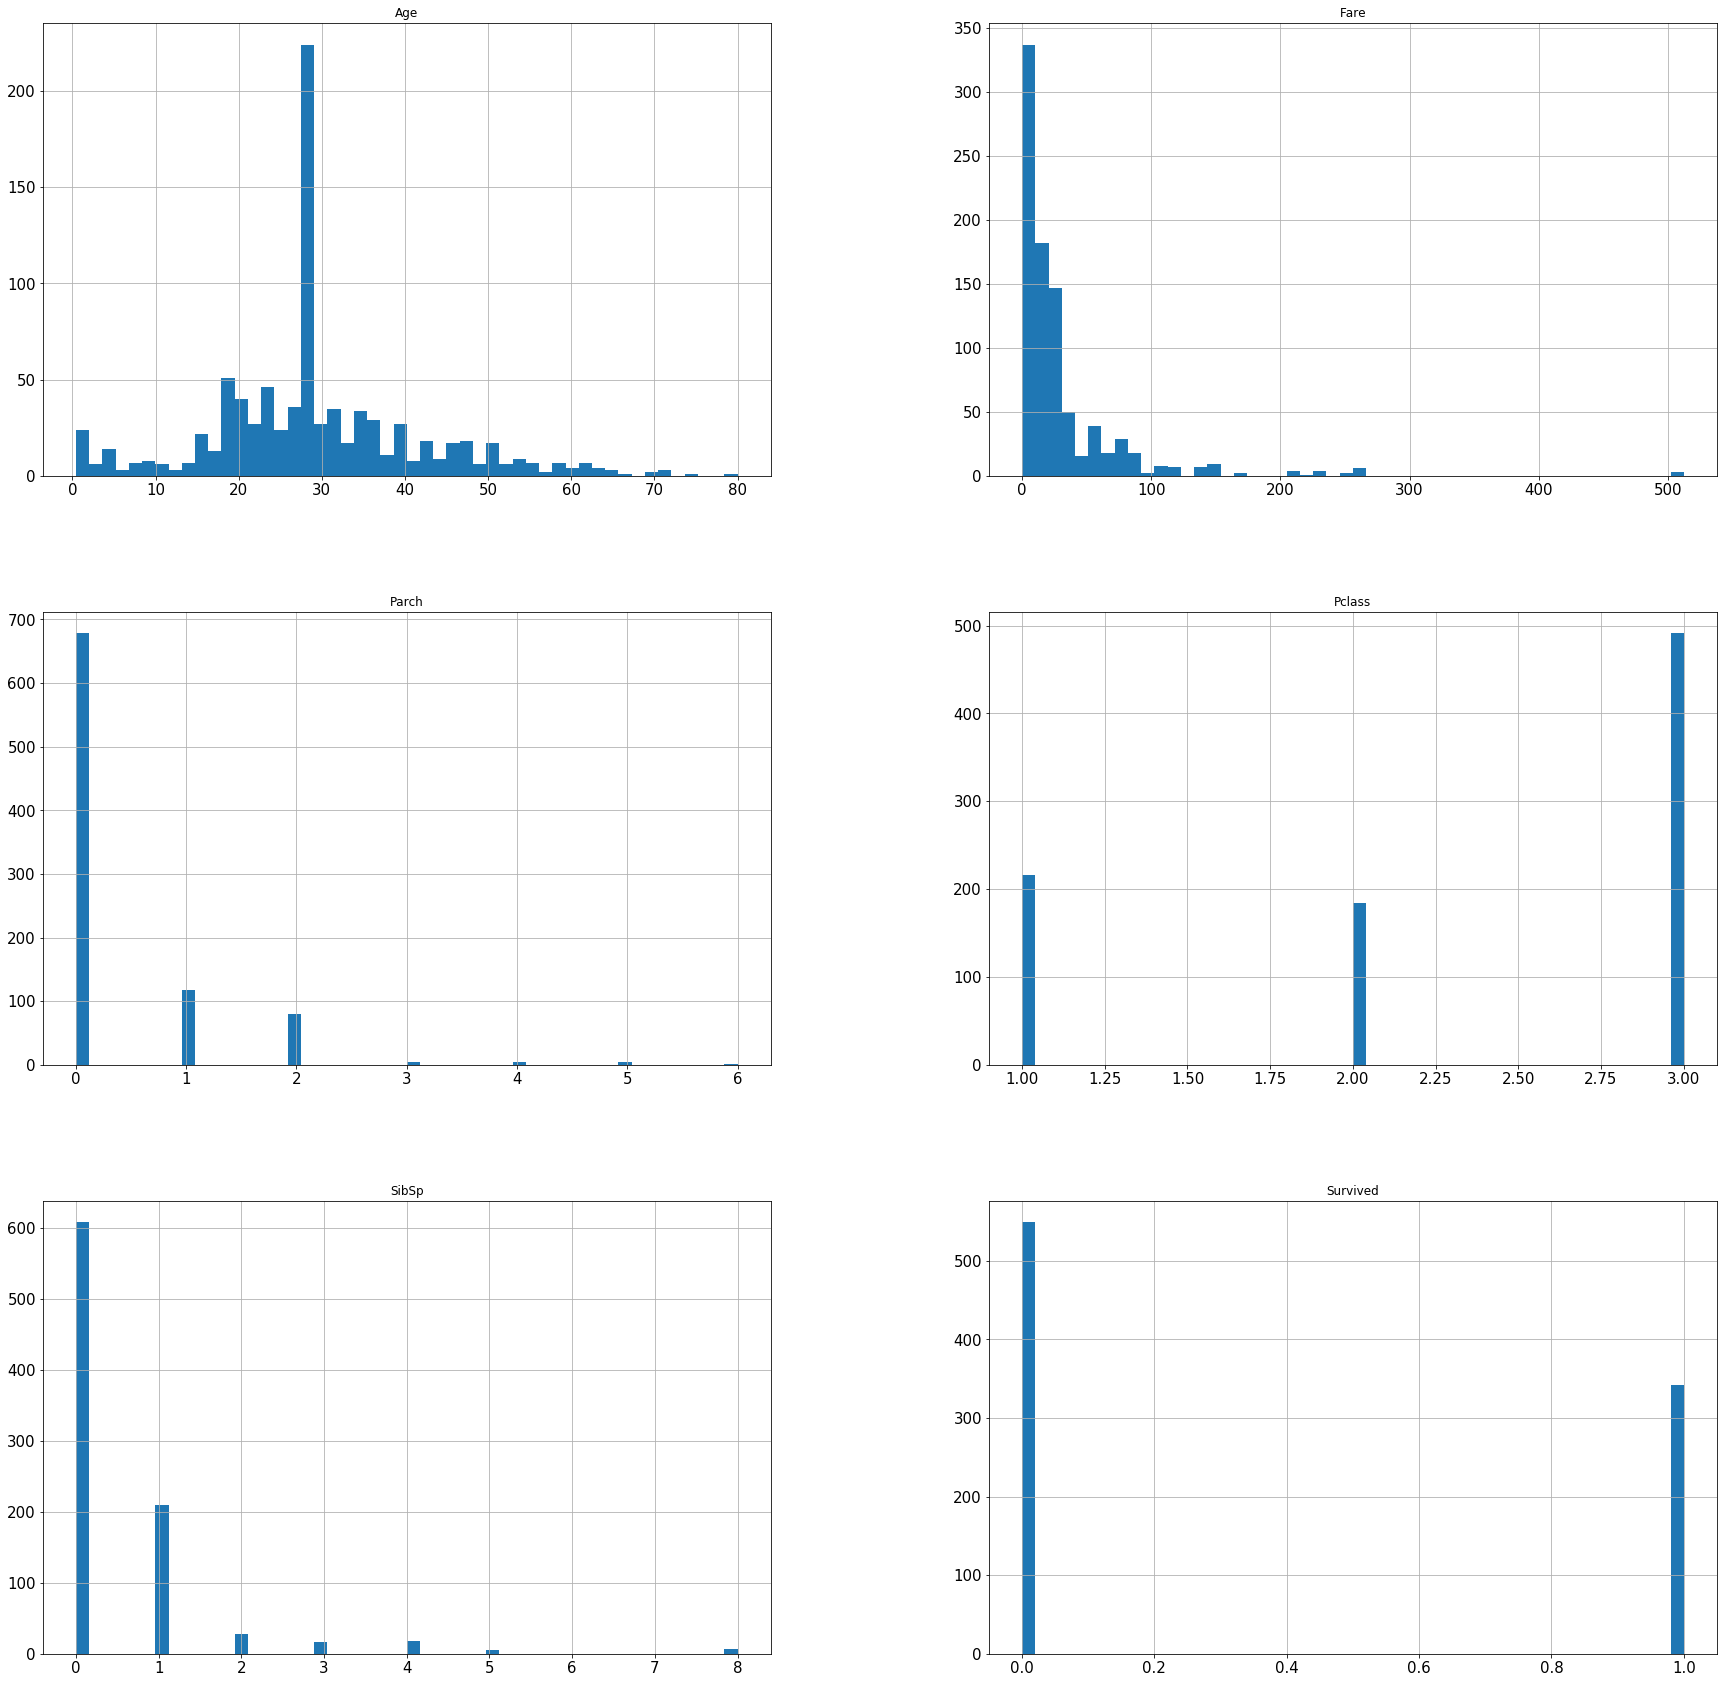

In [130]:
df.hist(figsize=(30,30),xlabelsize=15,ylabelsize=15,bins=50)

In [131]:
df['Fare']=np.round(df['Fare'])
test['Fare']=np.round(test['Fare'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.0,S
1,1,1,female,38.0,1,0,71.0,C
2,1,3,female,26.0,0,0,8.0,S
3,1,1,female,35.0,1,0,53.0,S
4,0,3,male,35.0,0,0,8.0,S


In [132]:
from sklearn.preprocessing import LabelEncoder #LabelEncoding the categorical variables
for c in cat_cols:
    df[c] = LabelEncoder().fit_transform(df[c])
for c in cat_cols:
    test[c] = LabelEncoder().fit_transform(test[c])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.0,2
1,1,1,0,38.0,1,0,71.0,0
2,1,3,0,26.0,0,0,8.0,2
3,1,1,0,35.0,1,0,53.0,2
4,0,3,1,35.0,0,0,8.0,2


In [133]:
from sklearn.preprocessing import StandardScaler
y=df['Survived']
df=df.drop('Survived', axis=1)
train_data = StandardScaler().fit_transform(df)
X=pd.DataFrame(data=train_data,columns=df.columns)

/home/susiejojo/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/susiejojo/.local/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [134]:
from sklearn.linear_model import LogisticRegression
test_data= StandardScaler().fit_transform(test)

/home/susiejojo/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/susiejojo/.local/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [135]:
LR=LogisticRegression(C=0.1,solver='liblinear').fit(X,y)

In [136]:
X_train,X_cv,y_train,y_cv=train_test_split(X,y,test_size=0.2,random_state=3)
X_test=pd.DataFrame(data=test_data,columns=test.columns)

In [137]:
LR.fit(X_train,y_train)
y_hat=LR.predict(X_test)
y_hat1=LR.predict(X_cv)

In [138]:
accuracy_score(y_hat1,y_cv)

0.7653631284916201

In [139]:
df_pred=pd.DataFrame()
test1=pd.read_csv('test.csv')

In [140]:
df_pred['PassengerId']=test1['PassengerId']
df_pred['Survived']=y_hat

In [141]:
df_pred.to_csv('newpred.csv',index=False)